In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load Raw data



In [205]:
df = pd.read_csv('../../../data/raw/steel_industry_data_excerpt.csv')

In [206]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,2018-01-01 02:30:00,3.78,4.72,0.00,0.0,62.51,100.00,9000,Weekday,Monday
1,2018-01-01 04:15:00,3.28,3.82,0.00,0.0,65.14,100.00,15300,Weekday,Monday
2,2018-01-01 05:45:00,3.28,3.49,0.00,0.0,68.48,100.00,20700,Weekday,Monday
3,2018-01-01 10:00:00,3.64,0.00,16.88,0.0,100.00,21.08,36000,Weekday,Monday
4,2018-01-01 10:30:00,3.71,0.00,18.00,0.0,100.00,20.19,37800,Weekday,Monday


In [207]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week'],
      dtype='object')

In [208]:
# rename columns for better readability
df = df.rename(columns={"Lagging_Current_Reactive.Power_kVarh":"Lagging_Current_Reactive_Power_kVarh", "CO2(tCO2)":"CO2"})

In [209]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week'],
      dtype='object')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  2190 non-null   object 
 1   Usage_kWh                             2190 non-null   float64
 2   Lagging_Current_Reactive_Power_kVarh  2190 non-null   float64
 3   Leading_Current_Reactive_Power_kVarh  2190 non-null   float64
 4   CO2                                   2190 non-null   float64
 5   Lagging_Current_Power_Factor          2190 non-null   float64
 6   Leading_Current_Power_Factor          2190 non-null   float64
 7   NSM                                   2190 non-null   int64  
 8   WeekStatus                            2190 non-null   object 
 9   Day_of_week                           2190 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 171.2+ KB


### Statiscal summary for Numerical instances



In [211]:

df.describe().apply(lambda s : s.apply(lambda x : format(x, 'f')))

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,28.438712,13.658685,3.959279,0.012027,80.943201,83.976822,43025.342466
std,34.055560,16.818180,7.512796,0.016445,18.751234,30.844623,24820.208535
min,2.480000,0.000000,0.000000,0.000000,40.710000,13.810000,0.000000
25%,3.240000,2.240000,0.000000,0.000000,64.125000,99.760000,21600.000000
50%,4.640000,5.040000,0.000000,0.000000,88.280000,100.000000,43200.000000
75%,52.780000,24.480000,2.200000,0.020000,99.087500,100.000000,64800.000000
max,145.300000,90.680000,27.360000,0.070000,100.000000,100.000000,85500.000000


### Observations from statistical summary - Numerical
- There are no missing values.
- Average power usage in kWh for the steel factory is 24kWh.Most energy consumption usages are below 4.5kWh.
- The majority of Lagging Reactive Power are at 5 kVarh. 
- The majority of CO2 values are 0. Average CO2 emissions is 0.01 ppm. 

### Statiscal summary for Catagorical values


In [212]:
df.describe(include=['object'])

,date,WeekStatus,Day_of_week
count,2190,2190,2190
unique,2190,2,7
top,2018-01-01 02:30:00,Weekday,Friday
freq,1,1586,333


### Observations from statiscal summary - Categorical
- There are no missing values.
- All the instances in date column has high cardinality


### Exploratory Data Analysis (EDA) - Goals

1. Analyse the distribution of energy consumption 
2. Analyse correlation of the attributes
3. Analyze energy consumption based on week status
4. Analyze energy consumption based on the day of week
5. Analyze frequency data ingestion by using NSM
6. Analyze energy consumption based on time of the day
7. Analyze the steel industry downtime.
8. Time series analysis for energy consumption

In [213]:
# get all the names of numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()


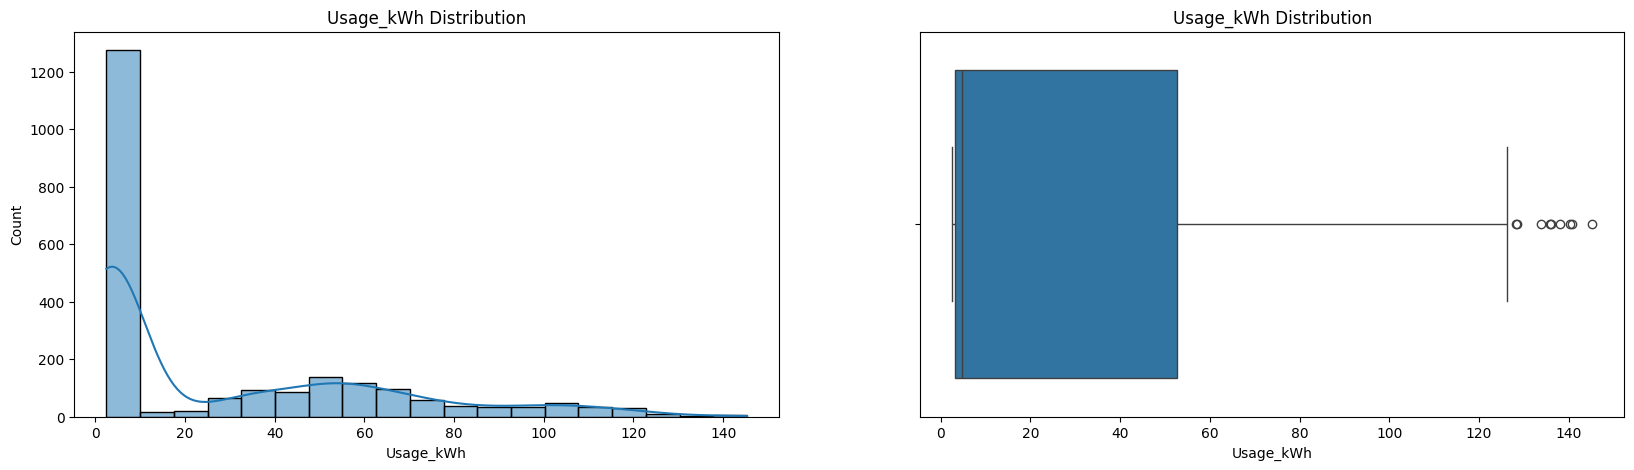

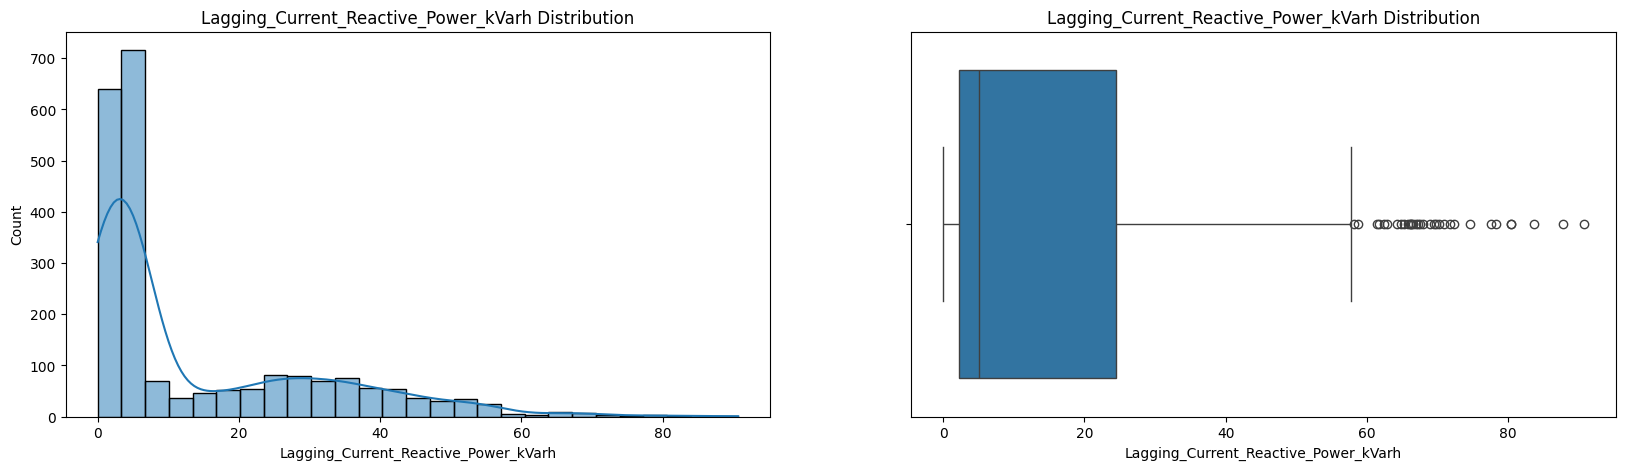

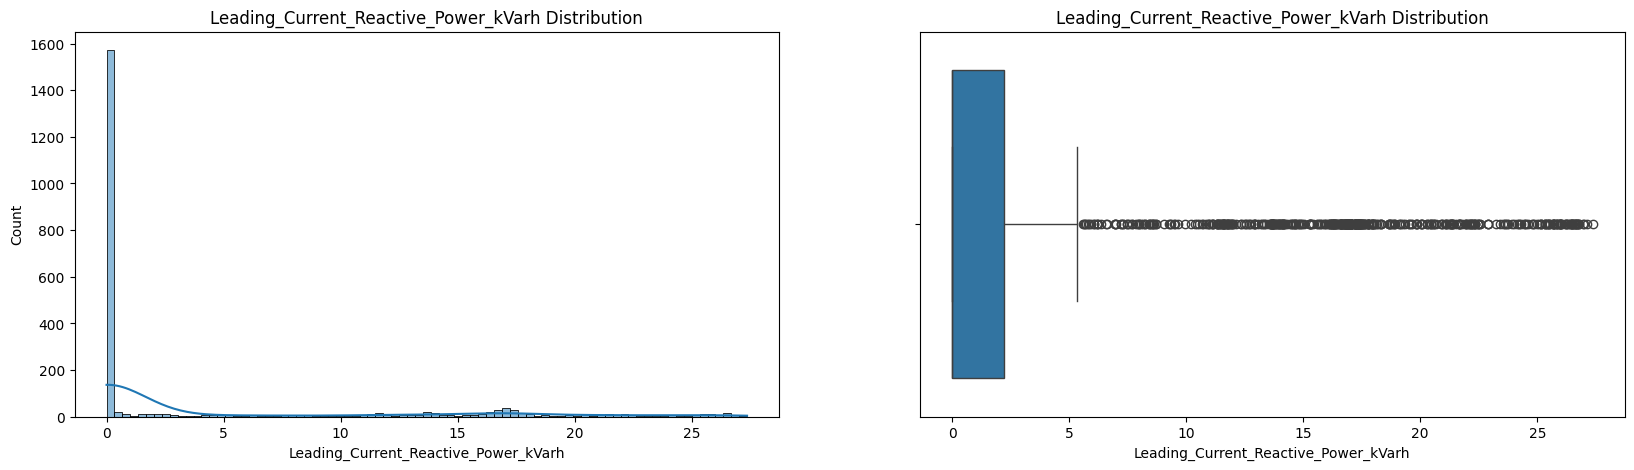

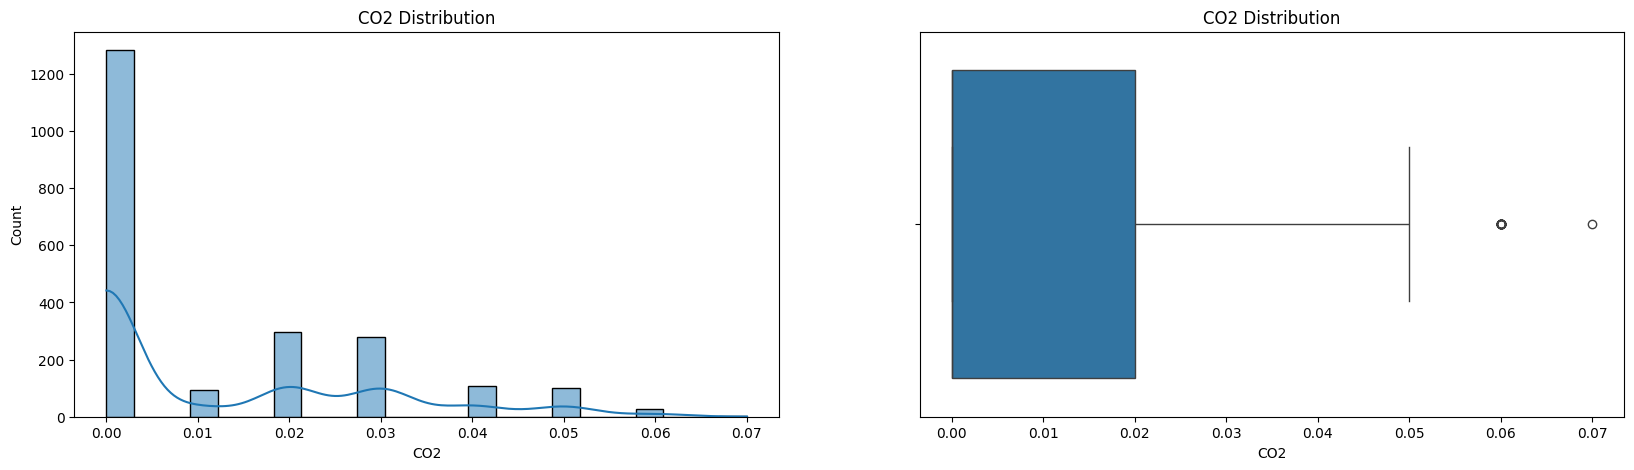

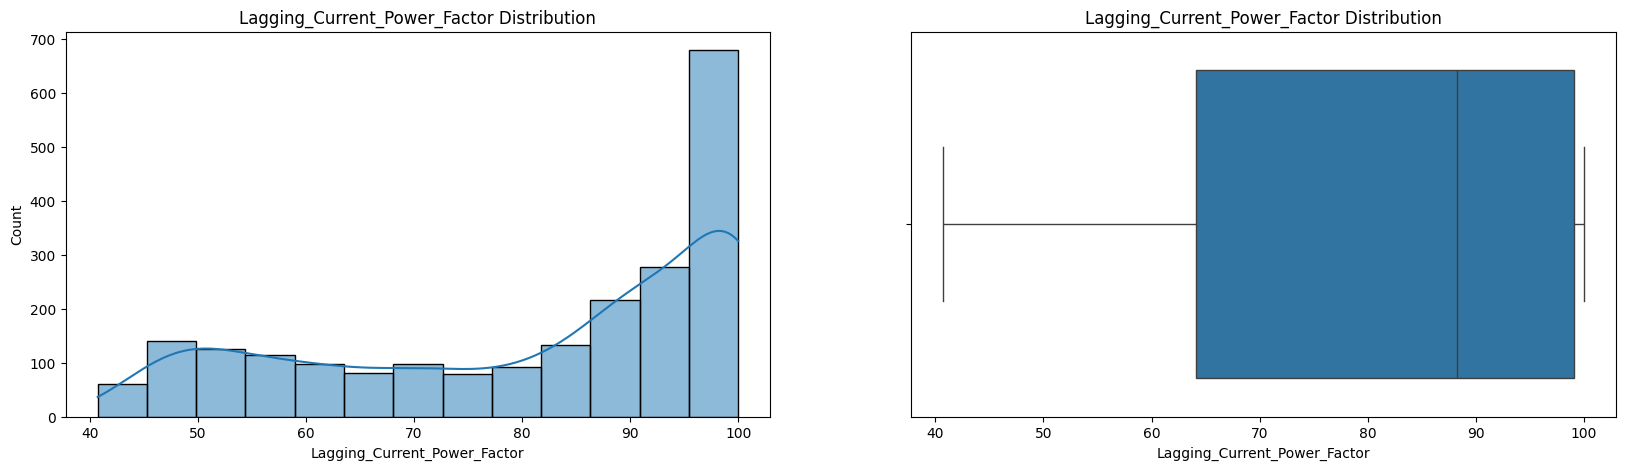

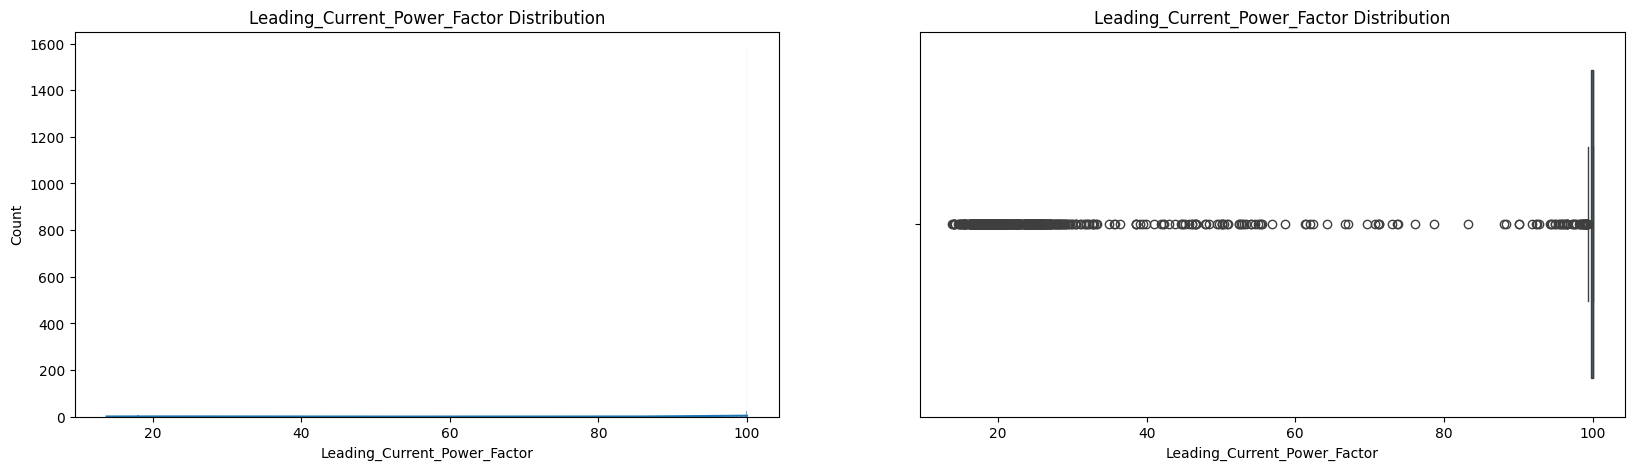

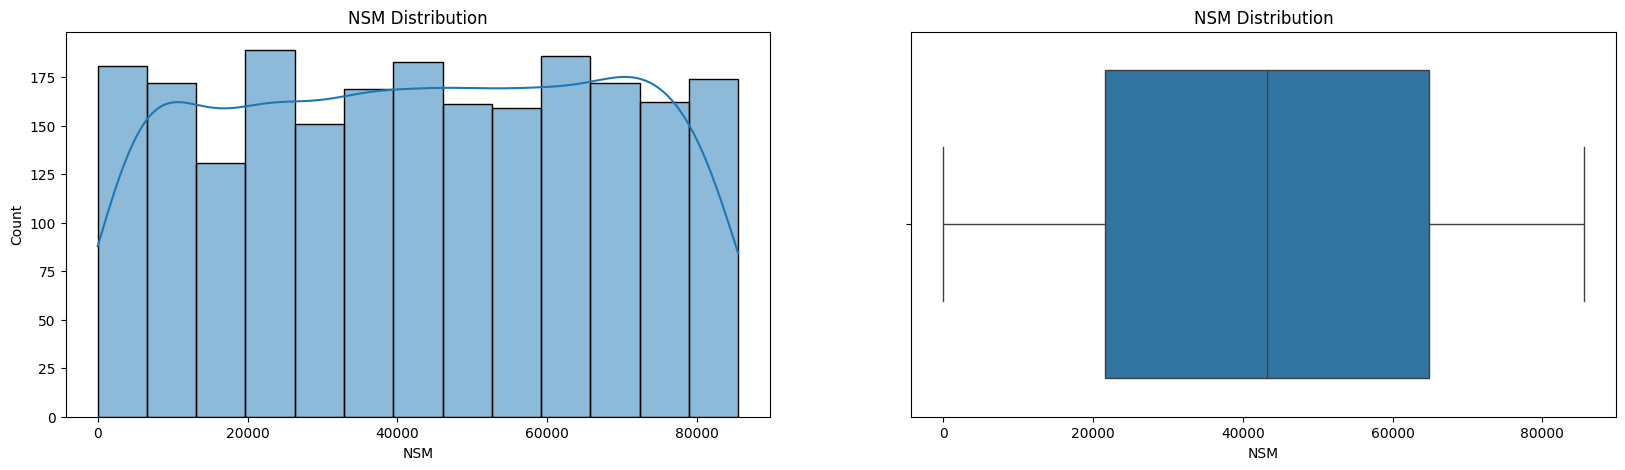

In [214]:
# Analyzing the distribution of energy consumption for all columns- shows as subplots bot hisplot and boxplot
for i in numerical_columns:
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True)
    plt.title(f'{i} Distribution')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[i])
    plt.title(f'{i} Distribution')
    plt.show()


### Observation
1. The distribution of energy consumption for the columns 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', and 'NSM' shows different patterns. Some columns have a skewed distribution, while others have a more symmetric distribution.
2. The boxplot of the factors of energy consumption shows that there are some outliers in the data for certain columns. This indicates that there may be extreme values or anomalies in those factors.
3. The Lagging Power Factor mainly distributes between 40 to 100. the Leading Power Factor only gathers at 100.
4. The values of Leading Current Power Factor range from 0 to 100 unevenly distributed.
5. NSM column is equally distributed from 0 to 80000.




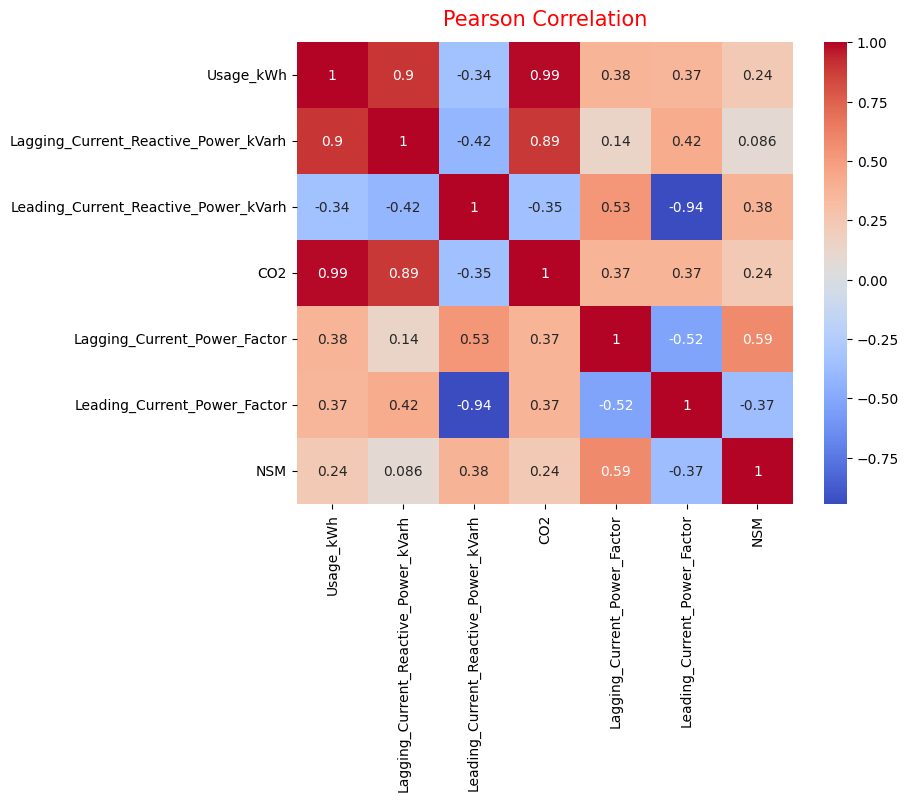

In [215]:
#plot the correlation using pearson correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = "coolwarm")
plt.title("Pearson Correlation", fontsize = 15, color = 'r', pad = 12, loc = 'center')
plt.show()

In [216]:
# correlation 
df.corr(numeric_only=True)

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.895114,-0.339615,0.990897,0.375708,0.367779,0.236589
Lagging_Current_Reactive_Power_kVarh,0.895114,1.000000,-0.416979,0.887555,0.135993,0.419932,0.085996
Leading_Current_Reactive_Power_kVarh,-0.339615,-0.416979,1.000000,-0.346646,0.528320,-0.944893,0.380657
CO2,0.990897,0.887555,-0.346646,1.000000,0.370261,0.373737,0.235123
Lagging_Current_Power_Factor,0.375708,0.135993,0.528320,0.370261,1.000000,-0.522966,0.587176
Leading_Current_Power_Factor,0.367779,0.419932,-0.944893,0.373737,-0.522966,1.000000,-0.371067
NSM,0.236589,0.085996,0.380657,0.235123,0.587176,-0.371067,1.000000


### Observations:
1. Strong Positive Correlations: Usage_kWh shows a strong positive correlation with CO2 (0.990897) and Lagging_Current_Reactive_Power_kVarh (0.895114). This indicates that as Usage_kWh increases, CO2 emissions and Lagging_Current_Reactive_Power_kVarh also tend to increase.
2. Strong Negative Correlations: Leading_Current_Reactive_Power_kVarh exhibits a strong negative correlation with Leading_Current_Power_Factor (-0.944893). This suggests an inverse relationship between leading reactive power and leading power factor.


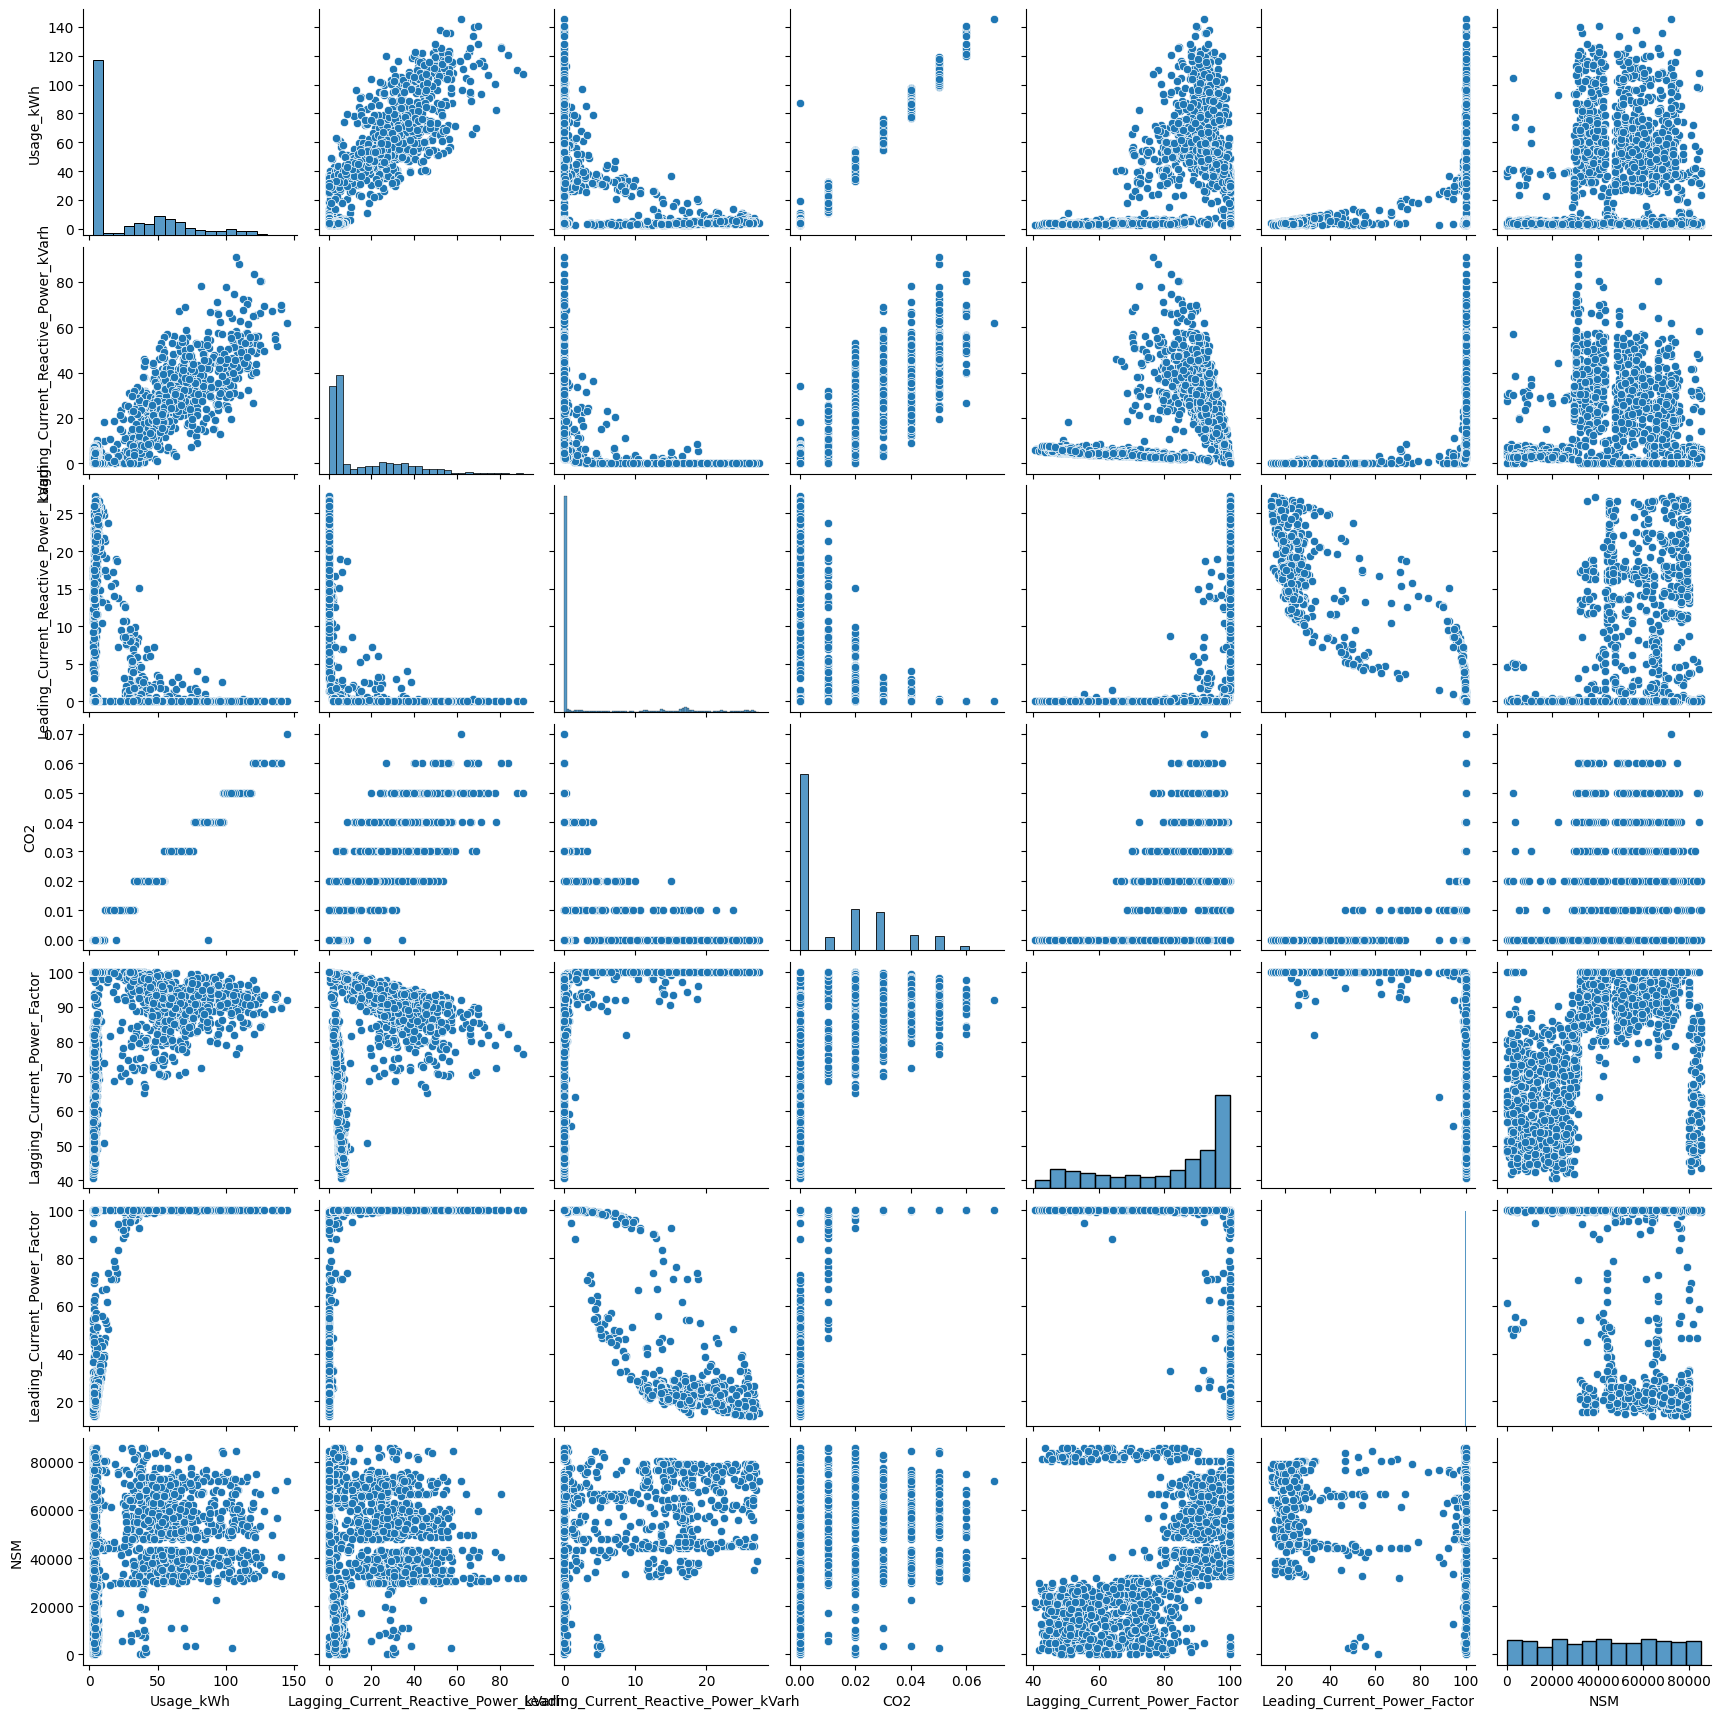

In [217]:
#confirm the above finidings by visualizing the correlation using pairplot
sns.pairplot(data=df[numerical_columns])
plt.show()

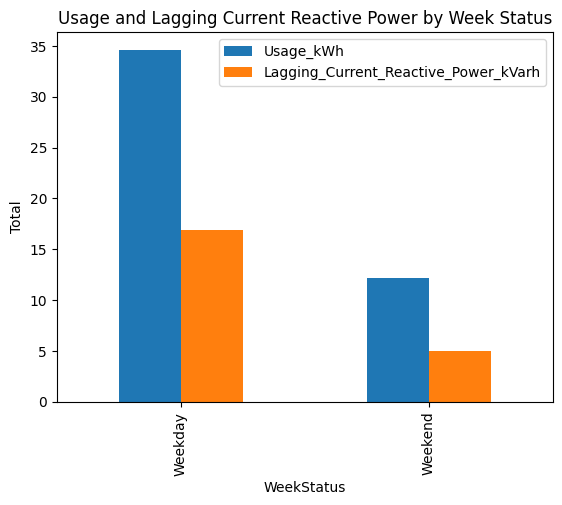

In [218]:
# group by weekstatus and plot usage and lagging current reactive power
df.groupby('WeekStatus')[['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh']].mean(numeric_only=True).plot(kind='bar')
plt.title('Usage and Lagging Current Reactive Power by Week Status')
plt.ylabel('Total')
plt.show()

### Observation
1. Energy Consumption is high on the weekdays and low on the weekends

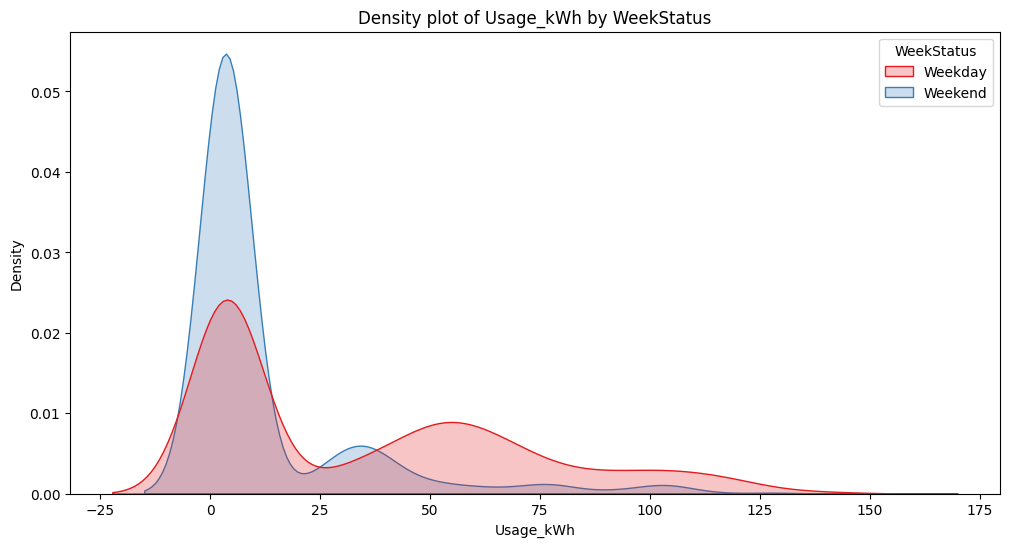

In [219]:
#visualizing densities using kdeplot for Usage_kWh by grouping weekstatus
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Usage_kWh', hue='WeekStatus', fill=True, common_norm=False, palette='Set1')
plt.title('Density plot of Usage_kWh by WeekStatus')
plt.show()


### Observation 
1. The energy consumption density on weekday and weekend is similar, with the highest density occurring at around a usage value of 5 kWh.

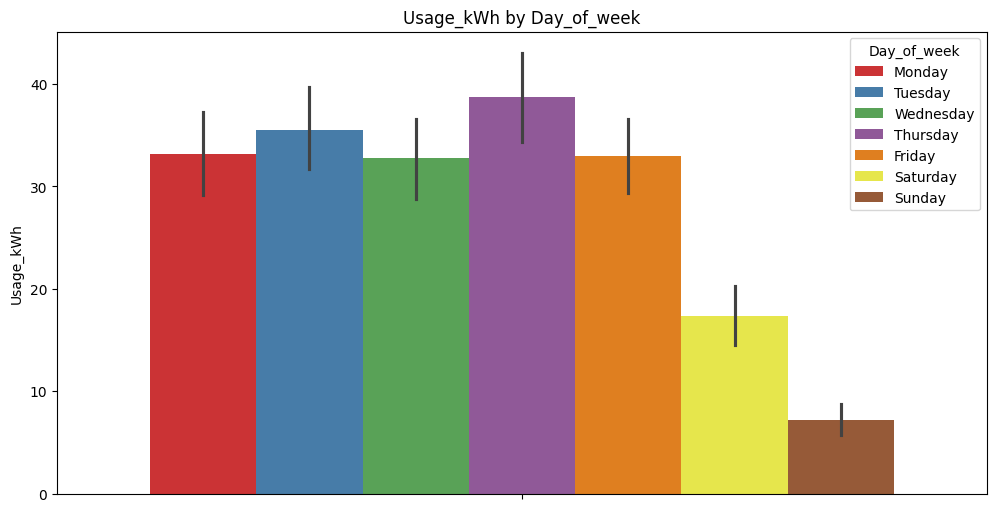

In [220]:
# visualizing Usage_kWh by grouping Day_of_week using barplot

plt.figure(figsize=(12, 6))
sns.barplot(data=df, hue='Day_of_week', y='Usage_kWh', palette='Set1')
plt.title('Usage_kWh by Day_of_week')
plt.show()


### Observation
1. The highest Industry Energy Consumption is seen on Thursday and lowest on Sunday.

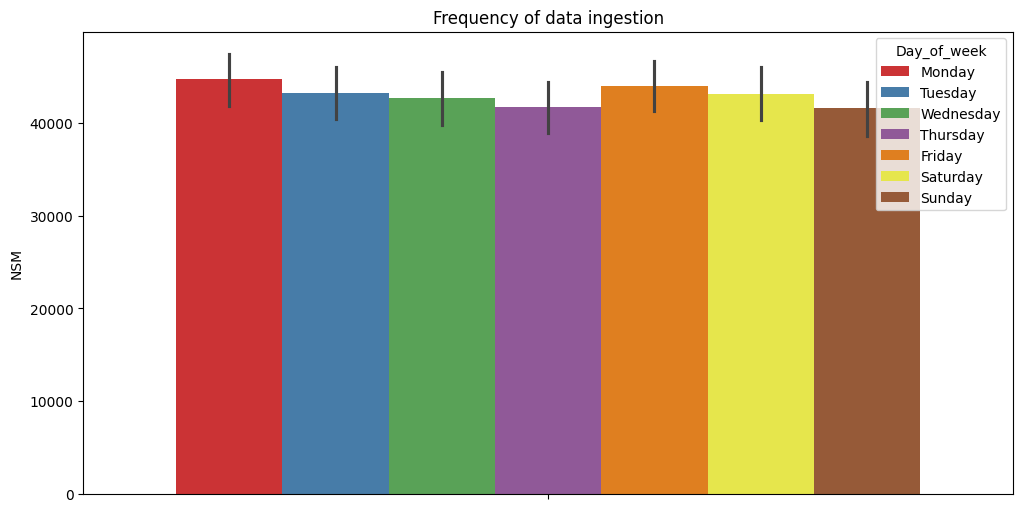

In [221]:
# visualizing frequency data ingestion by using NSM (Number of seconds since midnight) by grouping Day_of_week and NSM using bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, hue='Day_of_week', y='NSM', palette='Set1')
plt.title('Frequency of data ingestion')
plt.show()

### Obervation:
1. From the above bar chat, it is seen that data ingestion are same for all days and No any data loss.  

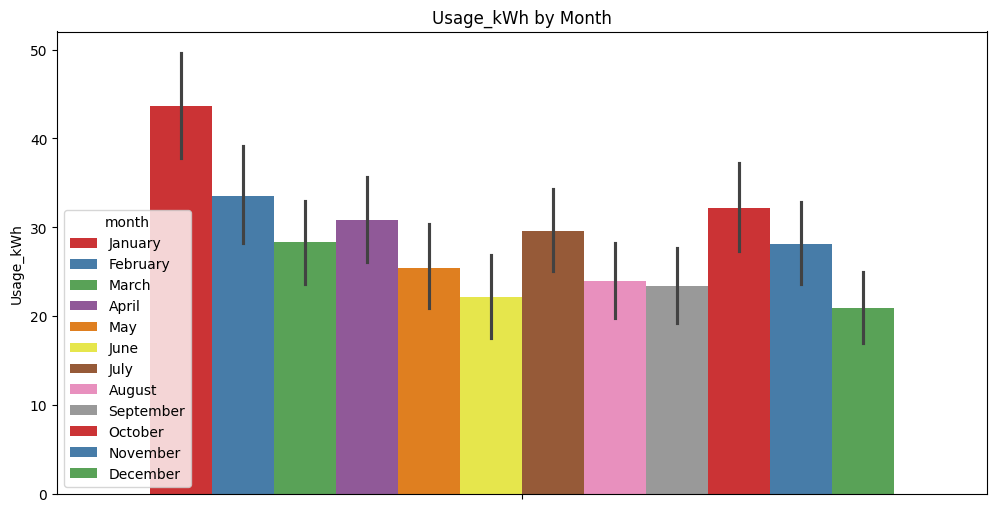

In [222]:
# visualizing Usage_kWh based on month
# assign corresponding month name to the month number
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['month'] = df['month'].replace({'01':'January', '02':'February', '03':'March', '04':'April', '05':'May', '06':'June', '07':'July', '08':'August', '09':'September', '10':'October', '11':'November', '12':'December'})

plt.figure(figsize=(12, 6))
sns.barplot(data=df, hue='month', y='Usage_kWh', palette='Set1')
plt.title('Usage_kWh by Month')
plt.show()


### Observation
1. Energy Consumption is highiest on January and lowest on December

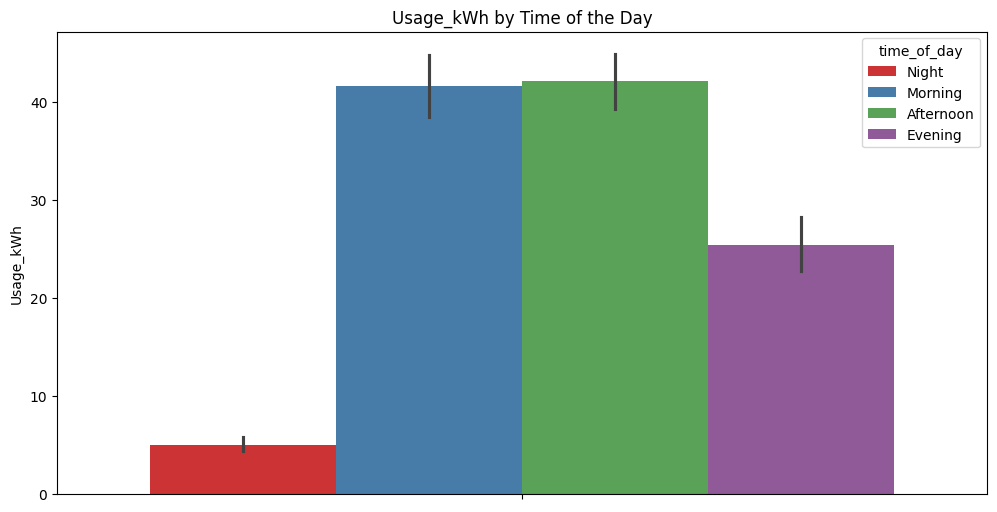

In [223]:
# visualizing energy consumption based on time of the day
# assign corresponding time of the day to the NSM
df['time_of_day'] = pd.cut(df['NSM'], bins=[0, 21600, 43200, 64800, 86400], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

plt.figure(figsize=(12, 6))
sns.barplot(data=df, hue='time_of_day', y='Usage_kWh', palette='Set1')
plt.title('Usage_kWh by Time of the Day')
plt.show()

### Observation
1. High energy consumption are noticed in the Morning and Afternoon

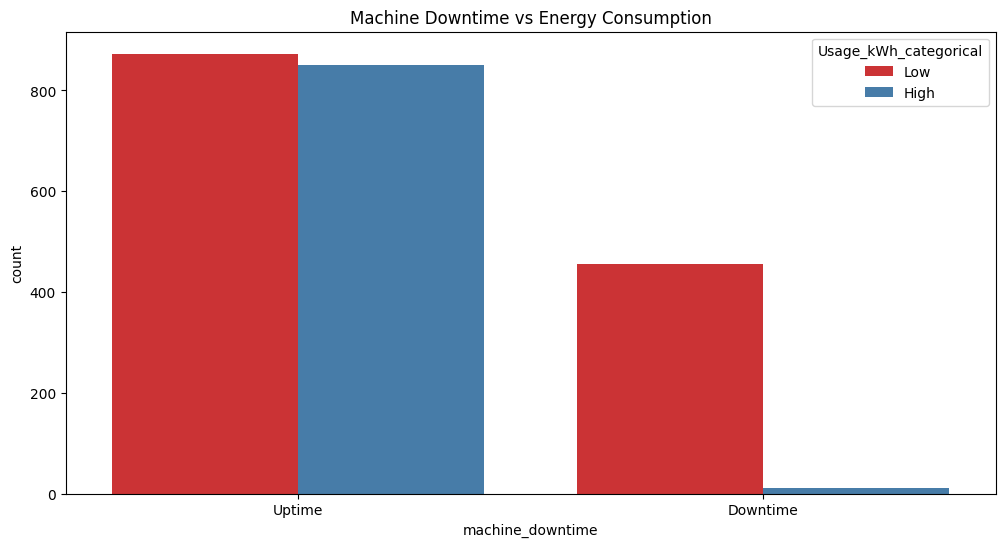

In [224]:
# Visulizing steel industry' machine downtime.
# create a new series for machine downtime, if Lagging_Current_Reactive_Power_kVarh is zero assign downtime else uptime
# crate a new series for the Usage_kWh if it is greater than mean assign high else low
df['machine_downtime'] = np.where(df['Lagging_Current_Reactive_Power_kVarh'] == 0, 'Downtime', 'Uptime')
df['Usage_kWh_categorical'] = np.where(df['Usage_kWh'] > df['Usage_kWh'].mean(), 'High', 'Low')

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='machine_downtime', hue='Usage_kWh_categorical', palette='Set1')
plt.title('Machine Downtime vs Energy Consumption')
plt.show()


<Figure size 1200x600 with 0 Axes>

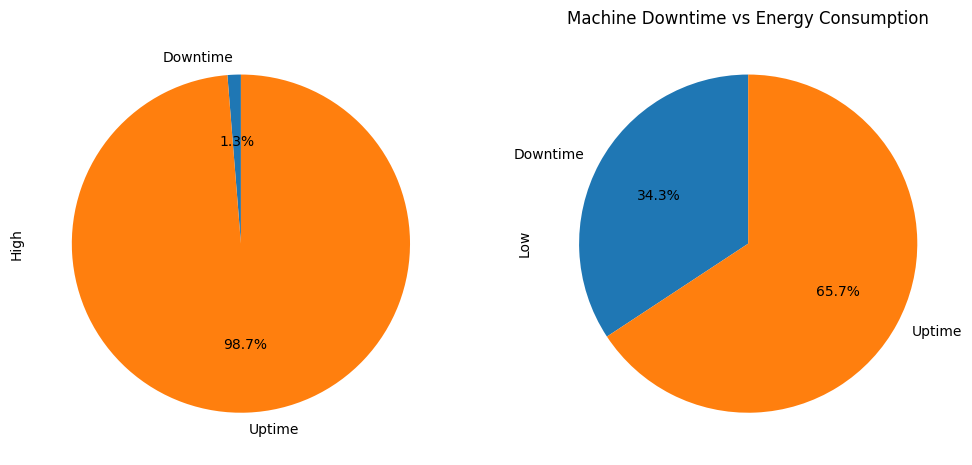

In [225]:
# visualizing the energy consumption by grouping machine downtime and energy consumption using pie chart
plt.figure(figsize=(12, 6))
df.groupby(['machine_downtime', 'Usage_kWh_categorical']).size().unstack().plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, legend=False, figsize=(12, 6))
plt.title('Machine Downtime vs Energy Consumption')
plt.show()

### Observation
1. It is seen that high energy consumption during uptime with less shutdowns or maintenance.
2. Similarly, Low energy consumption due to shutdowns or maintenance.

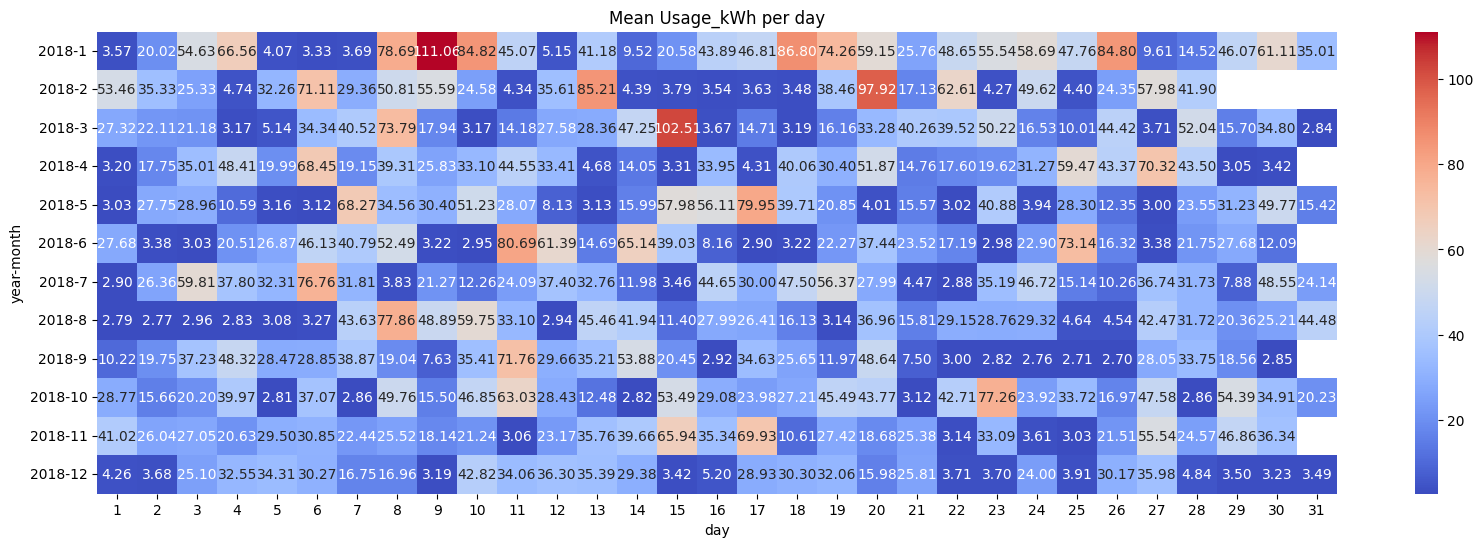

In [226]:
# time series analysis for mean usage_kWh per day by converting date to datetime and plotting heatmap
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
# annnote the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(df.groupby(['year', 'month', 'day'])['Usage_kWh'].mean().unstack(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Mean Usage_kWh per day')
plt.show()

### Save Dataset as csv format for data preparation 

In [227]:
df.to_csv('../../../data/processed/steel_industry_data_eda_done.csv', index=True)